# Benchmark Evaluation Notebook

For fast evaluation of results from unit testing pipeline changes

In [1]:
# Packages import
import os
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from scipy.optimize import curve_fit

# Get the directory path
wd = os.path.dirname(os.getcwd())

# Create the formatted path to the SPARCED input files
sparced_root = ('/'.join(wd.split(os.path.sep)[:wd.split(os.path.sep)
                                              .index('SPARCED')+1]))

sys.path.append(os.path.join(sparced_root, '/unit_tests/src'))
from observable_calc import *

### Figure 2B Benchmark

rounds to complete: 1
Round 0
Rank 0 is running average_sim for cell 0
1.1469276529341168
Size of results dictionary: 27565536 bytes
rank 0 catalogued
tasks this round: 1
Calculating observable
No experimental data to compare to
Generating Unit Test Plot


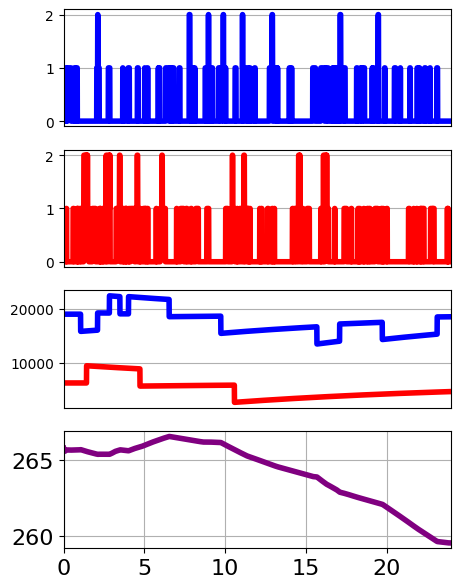

In [2]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig2B/scripts'))
!mpiexec -n 1 python3 run_unit_test.py
with open('../results/Fig2B.pkl', 'rb') as f: 
    data = pickle.load(f)

fig, ax = plt.subplots(4, 1, figsize=(5, 7))

ax[0].plot(data['average_sim']['cell 0']['ERK_total']['toutS']/3600.0,
           data['average_sim']['cell 0']['ERK_total']['xoutG'][:,115],'b',linewidth=4)
ax[0].grid(True)
ax[0].set_xlim(0, 24)
ax[0].set_xticks([])
# ax[0].set_yticks(ax[0].get_yticks(), fontsize=16, weight='bold')


ax[1].plot(data['average_sim']['cell 0']['ERK_total']['toutS']/3600.0,
           data['average_sim']['cell 0']['ERK_total']['xoutG'][:,116],'r',linewidth=4)
ax[1].grid(True)
ax[1].set_xlim(0, 24)
ax[1].set_xticks([])
# ax[1].set_yticks(fontsize=16, weight='bold')


mRNA_MAPK1_2mpc = data['average_sim']['cell 0']['MAPK1_mRNA']['xoutS']*(1/(1.0E9/(5.2500E-12*6.023E+23)))
mRNA_MAPK3_2mpc = data['average_sim']['cell 0']['MAPK3_mRNA']['xoutS']*(1/(1.0E9/(5.2500E-12*6.023E+23)))

ax[2].plot(data['average_sim']['cell 0']['MAPK3_mRNA']['toutS']/3600.0,mRNA_MAPK1_2mpc,'b',linewidth=4)
ax[2].grid(True)
ax[2].set_xlim(0, 24)
# plt.xticks(np.arange(0,24,step=4))
ax[2].set_xticks([])
# ax[2].set_yticks(ax[1].get_yticks(), fontsize=16, weight='bold')
# ax = plt.gca()
ax[2].yaxis.get_offset_text().set_fontsize(24)
ax[2].yaxis.get_offset_text().set_weight('bold')
# ax[2].ticklabel_format(style='sci', scilimits=(1, 1))
# plt.savefig('Fig2B_m1.png')

# plt.figure(figsize=(7, 4))
ax[2].plot(data['average_sim']['cell 0']['MAPK3_mRNA']['toutS']/3600.0,mRNA_MAPK3_2mpc,'r',linewidth=4)

ax[3].plot(data['average_sim']['cell 0']['ERK_total']['toutS']/3600.0,
         data['average_sim']['cell 0']['ERK_total']['xoutS'],'k',linewidth=4, color = 'purple')
# plt.xlabel('Time (hrs)')
# plt.ylabel('total ERK (nM)', multialignment='center')
ax[3].grid(True)
ax[3].set_xlim(0, 24)
# ax[3].set_xticks(np.arange(0,25,step=4), fontsize=16, weight='bold')
# For setting x-tick properties
ax[3].tick_params(axis='both', labelsize=16)
# ax[3].tick_params(axis='y', labelsize=16, labelweight='bold')

# plt.xticks([])
# plt.savefig('Fig2B_tERK.png')

### Figure 3A unit test replication

rounds to complete: 7
Round 0
Rank 4 is running P_10 for cell 0
Rank 5 is running F_1 for cell 0
Rank 7 is running INS_0p01 for cell 0
Rank 3 is running HGF_100 for cell 0
Rank 0 is running EGF_0p001 for cell 0
Rank 6 is running I_0p1 for cell 0
Rank 1 is running H_0p001 for cell 0
Rank 2 is running H_1000 for cell 0
1.1098207308518027
Size of results dictionary: 128 bytes
Rank 7 sending
1.1098207308517476
Size of results dictionary: 128 bytes
tasks this round: 8
receiving
Rank 7 sent
1.109820730851804
received results
completed tasks: 1
receiving
Size of results dictionary: 128 bytes
Rank 4 sending
Rank 4 sent
received results
completed tasks: 2
receiving
1.1098207308518027
Size of results dictionary: 128 bytes
Rank 3 sending
Rank 3 sent
received results
completed tasks: 3
receiving
1.1098207308518047
Size of results dictionary: 128 bytes
Rank 6 sending
Rank 6 sent
received results
completed tasks: 4
receiving
1.1098207308518009
Size of results dictionary: 128 bytes
Rank 5 sending
Ran

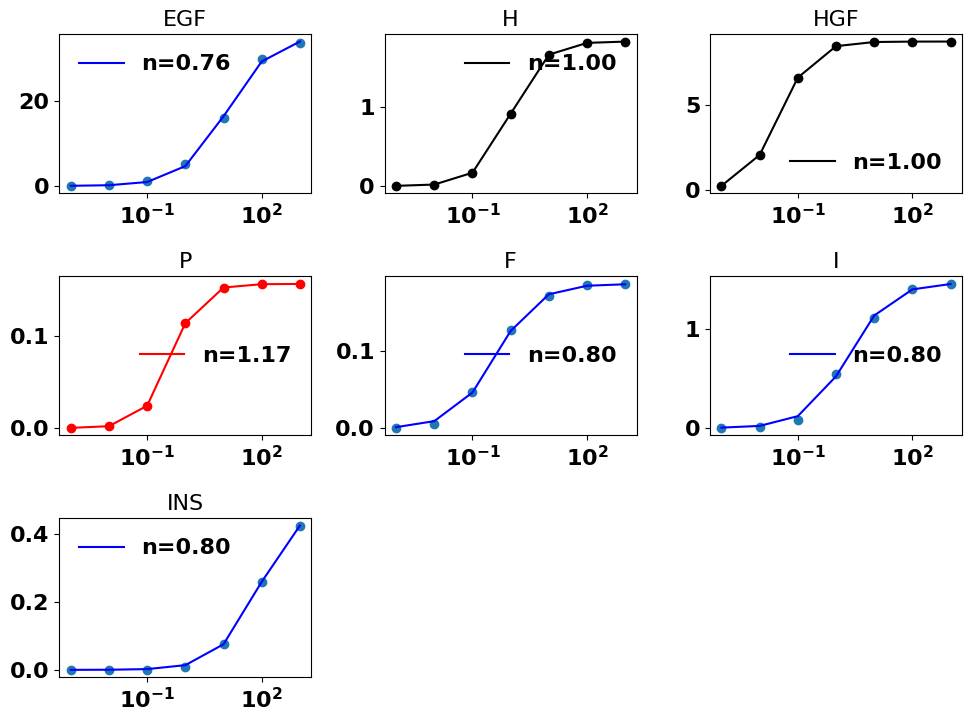

In [3]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3A/scripts'))
!mpiexec -n 8 python3 run_unit_test.py
with open('../results/Fig3A.pkl', 'rb') as f:
    data = pickle.load(f)

ligInds = [155,156,157,158,159,160,161] # E, H, HGF, P, F, I, INS
ligConc = [0.001,0.01,0.1,1,10,100,1000]
ResInds = [162,166,167,170,171,172,173,174] # E1, E3, E4, Met, Pr, Fr, Ir, Isr
RecConc = 60.8754593

conds = {}

observables = ['EE1_species', 'HE3_species', 'HE4_species', 'HGF_species', 'Ppr_species',
                'Ffr_species', 'EE1E2_species', 'EE1Ev3_species', 'EE1E4_species', 'E2HE3_species', 
                'E1HE3_species', 'HE3E3_species', 'HE3Ev3_species', 'HE3E4_species', 'E2HE4_species', 
                'HE4Ev3_species', 'E1HE4_species', 'E3HE4_species', 'HE4E4_species', 'HGF_Met_Met_species', 
                'PPrPr_species', 'FFrFr_species', 'IIrIr_species', 'INS_Isr_Isr_species', 'EE1EE1_species', 
                'EE1HE3_species', 'EE1HE4_species', 'HE3HE3_species', 'HE3HE4_species', 'HE4HE4_species', 
                'HGF_Met_HGF_Met_species', 'PPrPPr_species', 'FFrFFr_species', 'IIrIrI_species', 'INS_Isr_Isr_INS_species']


for condition in data:
    SPInds = []
    SPPInds = []
    SPSPInds = []
    for i in range(6):
        SPInds.append(data[condition]['cell 0'][observables[i]]['xoutS'][-1])
    for i in range(6, 26):
        SPPInds.append(data[condition]['cell 0'][observables[i]]['xoutS'][-1])
    for i in range(26, 35):
        SPSPInds.append(data[condition]['cell 0'][observables[i]]['xoutS'][-1])

    ns_prod_sum = sum(SPInds) + sum(SPPInds) + 2.0*sum(SPSPInds)

    conds[condition] = ns_prod_sum


egf_results = list(conds.values())[0:7]
print(egf_results)
h_results = list(conds.values())[7:14]
print(h_results)
hgf_results = list(conds.values())[14:21]
print(hgf_results)
p_results = list(conds.values())[21:28]
print(p_results)
f_results = list(conds.values())[28:35]
print(f_results)
i_results = list(conds.values())[35:42]
print(i_results)
ins_results = list(conds.values())[42:49]
print(ins_results)

list_of_results = [egf_results, h_results, hgf_results, p_results, f_results, i_results, ins_results]
list_of_ligands = ['EGF', 'H', 'HGF', 'P', 'F', 'I', 'INS']

print(h_results)

# Define the function you want to fit
def func(x, a, b, c):
    return a * np.power(x, b) / (np.power(c, b) + np.power(x, b))

# Calculate the number of rows based on the number of results
num_results = len(list_of_results)
num_columns = 3
num_rows = -(-num_results // num_columns)  # Ceiling division to ensure all results are shown


# Set global plot attributes
plt.rc('font', size=16, weight='bold')  # Set fontsize and font weight
plt.rc('axes', titlesize=16)             # Set title fontsize
# plt.rc('axes', labelsize=12)             # Set label fontsize
plt.rc('xtick', labelsize=16)            # Set x-axis tick label fontsize
plt.rc('ytick', labelsize=16)            # Set y-axis tick label fontsize
plt.rc('legend', fontsize=16)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7.5))

hill_curve_data = {}

# Loop through each lig_result and plot on separate subplots
for i, lig_result in enumerate(list_of_results):
    hill_curve_data[list_of_ligands[i]] = {}
    x_data = ligConc
    y_data = lig_result
    # Fit the curve
    params, covariance = curve_fit(func, x_data, y_data)
    a_fit, b_fit, c_fit = params
    y_fit = func(x_data, a_fit, b_fit, c_fit)

    hill_curve_data[list_of_ligands[i]]['x'] = x_data
    hill_curve_data[list_of_ligands[i]]['y'] = y_data
    hill_curve_data[list_of_ligands[i]]['fit'] = y_fit
    hill_curve_data[list_of_ligands[i]]['hill coefficient'] = b_fit


axes[0, 0].scatter(hill_curve_data['EGF']['x'], hill_curve_data['EGF']['y'])
axes[0, 0].plot(hill_curve_data['EGF']['x'], hill_curve_data['EGF']['fit'], \
    label=f'n={hill_curve_data["EGF"]["hill coefficient"]:.2f}', color='blue')
axes[0, 0].set_title('EGF')
axes[0, 0].set_xscale('log', base=10)
axes[0, 0].legend(frameon=False)

axes[0, 1].scatter(hill_curve_data['H']['x'], hill_curve_data['H']['y'], color='black')
axes[0, 1].plot(hill_curve_data['H']['x'], hill_curve_data['H']['fit'], \
    label=f'n={hill_curve_data["H"]["hill coefficient"]:.2f}', color='black')
axes[0, 1].set_title('H')
axes[0, 1].set_xscale('log', base=10)
axes[0, 1].legend(frameon=False)

axes[0, 2].scatter(hill_curve_data['HGF']['x'], hill_curve_data['HGF']['y'], color='black')
axes[0, 2].plot(hill_curve_data['HGF']['x'], hill_curve_data['HGF']['fit'], \
    label=f'n={hill_curve_data["HGF"]["hill coefficient"]:.2f}', color='black')
axes[0, 2].set_title('HGF')
axes[0, 2].set_xscale('log', base=10)
axes[0, 2].legend(frameon=False)

axes[1, 0].scatter(hill_curve_data['P']['x'], hill_curve_data['P']['y'],color='red')
axes[1, 0].plot(hill_curve_data['P']['x'], hill_curve_data['P']['fit'], \
    label=f'n={hill_curve_data["P"]["hill coefficient"]:.2f}', color='red')
axes[1, 0].set_title('P')
axes[1, 0].set_xscale('log', base=10)
axes[1, 0].legend(frameon=False)

axes[1, 1].scatter(hill_curve_data['F']['x'], hill_curve_data['F']['y'])
axes[1, 1].plot(hill_curve_data['F']['x'], hill_curve_data['F']['fit'], \
    label=f'n={hill_curve_data["F"]["hill coefficient"]:.2f}', color='blue')
axes[1, 1].set_title('F')
axes[1, 1].set_xscale('log', base=10)
axes[1, 1].legend(frameon=False)

axes[1, 2].scatter(hill_curve_data['I']['x'], hill_curve_data['I']['y'])
axes[1, 2].plot(hill_curve_data['I']['x'], hill_curve_data['I']['fit'], \
    label=f'n={hill_curve_data["I"]["hill coefficient"]:.2f}', color='blue')
axes[1, 2].set_title('I')
axes[1, 2].set_xscale('log', base=10)
axes[1, 2].legend(frameon=False)

axes[2, 0].scatter(hill_curve_data['INS']['x'], hill_curve_data['INS']['y'])
axes[2, 0].plot(hill_curve_data['INS']['x'], hill_curve_data['INS']['fit'], \
    label=f'n={hill_curve_data["INS"]["hill coefficient"]:.2f}', color='blue')
axes[2, 0].set_title('INS')
axes[2, 0].set_xscale('log', base=10)
axes[2, 0].legend(frameon=False)


fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])
plt.tight_layout()

# Show the entire figure
plt.savefig('../results/Fig3A.png')

### Figure 3BCD unit test replication

rounds to complete: 2
Round 0
Rank 1 is running EGF_1 for cell 0
Rank 4 is running EGF_INS_0.01_0.17 for cell 0
Rank 2 is running INS_0.17 for cell 0
Rank 3 is running INS_17.0 for cell 0
Rank 5 is running EGF_INS_10_0.17 for cell 0
Rank 0 is running EGF_0.0 for cell 0
Rank 7 is running Neg_Control for cell 0
Rank 6 is running serum_starved for cell 0
1.1002142305334925
Size of results dictionary: 128 bytes
Rank 4 sending
1.1001925631077636
Size of results dictionary: 128 bytes
Rank 3 sending
1.1003672154449584
Size of results dictionary: 128 bytes
Rank 6 sending
1.100353575177377
Size of results dictionary: 128 bytes
Rank 2 sending
1.099909378765925
Size of results dictionary: 128 bytes
Rank 1 sending
1.0999217020843075
Size of results dictionary: 128 bytes
Rank 5 sending
1.1003672154449584
Size of results dictionary: 128 bytes
Rank 7 sending
1.1002215108254465
Size of results dictionary: 128 bytes
tasks this round: 8
receiving
Rank 4 sent
received results
completed tasks: 1
receiving

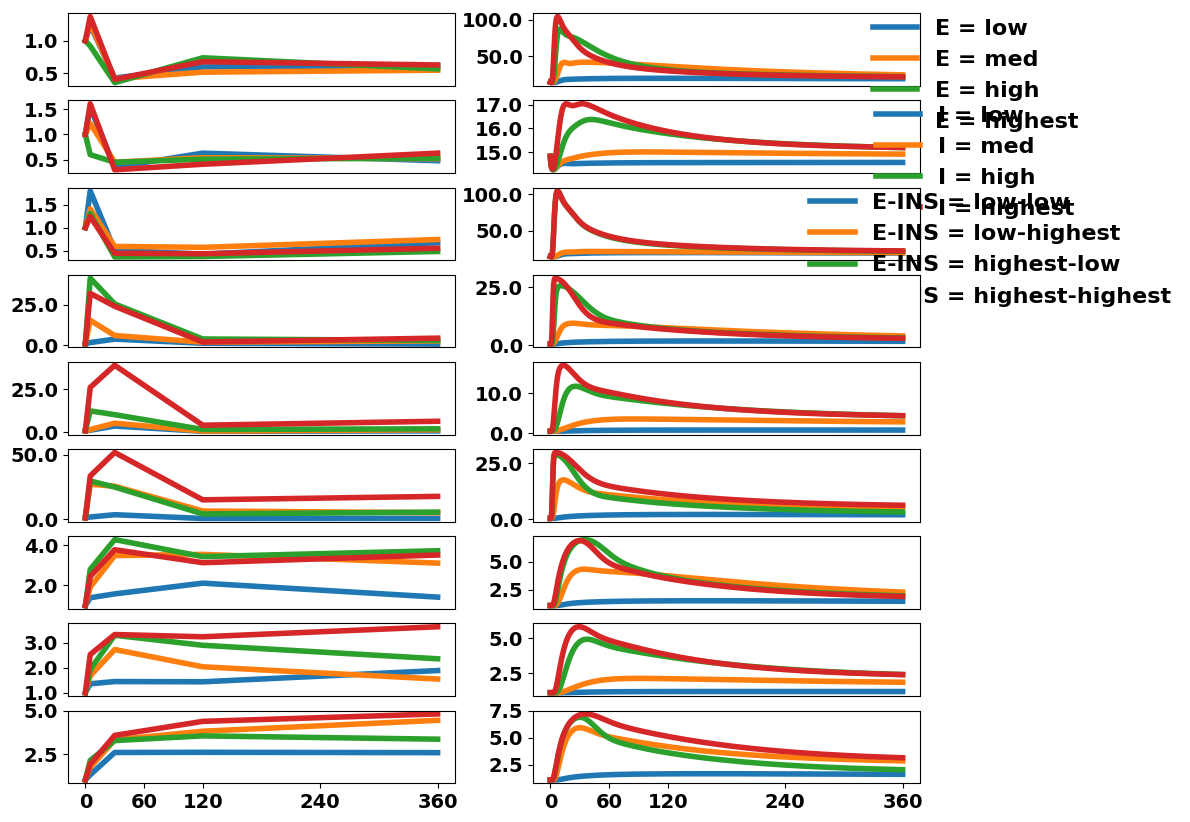

In [4]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3BCD/scripts'))
!mpiexec -n 8 python3 run_unit_test.py
# Plot experiment beside simulation
with open('../results/Fig3BCD.pkl', 'rb') as f:
    data = pickle.load(f)
conditions = []

for condition in data:
    conditions.append(condition)

fig, axs = plt.subplots(9, 2, figsize=(11, 10))

#Experimental EGF for ppERK
axs[0,0].plot(data[conditions[0]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[0]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[0,0].plot(data[conditions[1]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[1]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[0,0].plot(data[conditions[2]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[2]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[0,0].plot(data[conditions[3]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[3]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)

#Experimental INS for ppERK
axs[1,0].plot(data[conditions[4]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[4]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[1,0].plot(data[conditions[5]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[5]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[1,0].plot(data[conditions[6]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[6]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[1,0].plot(data[conditions[7]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[7]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)

#Experimental EGF+INS for ppERK
axs[2,0].plot(data[conditions[8]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[8]]['cell 0']['experiment ppERK_total']['xoutS'],linewidth=4)
axs[2,0].plot(data[conditions[9]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[9]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[2,0].plot(data[conditions[10]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[10]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)
axs[2,0].plot(data[conditions[11]]['cell 0']['experiment ppERK_total']['toutS']/3600, data[conditions[11]]['cell 0']['experiment ppERK_total']['xoutS'], linewidth=4)

#Experimental EGF for ppAKT
axs[3,0].plot(data[conditions[0]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[0]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[3,0].plot(data[conditions[1]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[1]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[3,0].plot(data[conditions[2]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[2]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[3,0].plot(data[conditions[3]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[3]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)

#Experimental INS for ppAKT
axs[4,0].plot(data[conditions[4]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[4]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[4,0].plot(data[conditions[5]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[5]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[4,0].plot(data[conditions[6]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[6]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[4,0].plot(data[conditions[7]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[7]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)

#Experimental EGF+INS for ppAKT
axs[5,0].plot(data[conditions[8]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[8]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[5,0].plot(data[conditions[9]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[9]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[5,0].plot(data[conditions[10]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[10]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)
axs[5,0].plot(data[conditions[11]]['cell 0']['experiment ppAKT_total']['toutS']/3600, data[conditions[11]]['cell 0']['experiment ppAKT_total']['xoutS'], linewidth=4)

#Experimental EGF for pEIF4BP1
axs[6,0].plot(data[conditions[0]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[0]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[6,0].plot(data[conditions[1]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[1]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[6,0].plot(data[conditions[2]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[2]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[6,0].plot(data[conditions[3]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[3]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)

#Experimental INS for pEIF4BP1
axs[7,0].plot(data[conditions[4]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[4]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[7,0].plot(data[conditions[5]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[5]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[7,0].plot(data[conditions[6]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[6]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[7,0].plot(data[conditions[7]]['cell 0']['experiment pEIF4BP1_total']['toutS']/3600, data[conditions[7]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)

#Experimental EGF+INS for pEIF4BP1
axs[8,0].plot(data[conditions[8]]['cell 0']['experiment pEIF4BP1_total']['toutS']/60, data[conditions[8]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[8,0].plot(data[conditions[9]]['cell 0']['experiment pEIF4BP1_total']['toutS']/60, data[conditions[9]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[8,0].plot(data[conditions[10]]['cell 0']['experiment pEIF4BP1_total']['toutS']/60, data[conditions[10]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)
axs[8,0].plot(data[conditions[11]]['cell 0']['experiment pEIF4BP1_total']['toutS']/60, data[conditions[11]]['cell 0']['experiment pEIF4BP1_total']['xoutS'], linewidth=4)

#Simulated EGF for ppERK
axs[0,1].plot(data[conditions[0]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[0]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[0,1].plot(data[conditions[1]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[1]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[0,1].plot(data[conditions[2]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[2]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[0,1].plot(data[conditions[3]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[3]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)

#Simulated INS for ppERK
axs[1,1].plot(data[conditions[4]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[4]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[1,1].plot(data[conditions[5]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[5]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[1,1].plot(data[conditions[6]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[6]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[1,1].plot(data[conditions[7]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[7]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)

#Simulated EGF+INS for ppERK
axs[2,1].plot(data[conditions[8]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[8]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[2,1].plot(data[conditions[9]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[9]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[2,1].plot(data[conditions[10]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[10]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
axs[2,1].plot(data[conditions[11]]['cell 0']['ppERK_total']['toutS']/3600, data[conditions[11]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)

#Simulated EGF for ppAKT
axs[3,1].plot(data[conditions[0]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[0]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[3,1].plot(data[conditions[1]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[1]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[3,1].plot(data[conditions[2]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[2]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[3,1].plot(data[conditions[3]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[3]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)

#Simulated INS for ppAKT
axs[4,1].plot(data[conditions[4]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[4]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[4,1].plot(data[conditions[5]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[5]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[4,1].plot(data[conditions[6]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[6]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[4,1].plot(data[conditions[7]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[7]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)

#Simulated EGF+INS for ppAKT
axs[5,1].plot(data[conditions[8]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[8]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[5,1].plot(data[conditions[9]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[9]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[5,1].plot(data[conditions[10]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[10]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)
axs[5,1].plot(data[conditions[11]]['cell 0']['ppAKT_total']['toutS']/3600, data[conditions[11]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)

#Simulated EGF for pEIF4BP1
axs[6,1].plot(data[conditions[0]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[0]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[6,1].plot(data[conditions[1]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[1]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[6,1].plot(data[conditions[2]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[2]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[6,1].plot(data[conditions[3]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[3]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)

#Simulated INS for pEIF4BP1
axs[7,1].plot(data[conditions[4]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[4]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[7,1].plot(data[conditions[5]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[5]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[7,1].plot(data[conditions[6]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[6]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[7,1].plot(data[conditions[7]]['cell 0']['pEIF4BP1_total']['toutS']/3600, data[conditions[7]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)

#Simulated EGF+INS for pEIF4BP1
axs[8,1].plot(data[conditions[8]]['cell 0']['pEIF4BP1_total']['toutS']/60, data[conditions[8]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[8,1].plot(data[conditions[9]]['cell 0']['pEIF4BP1_total']['toutS']/60, data[conditions[9]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[8,1].plot(data[conditions[10]]['cell 0']['pEIF4BP1_total']['toutS']/60, data[conditions[10]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)
axs[8,1].plot(data[conditions[11]]['cell 0']['pEIF4BP1_total']['toutS']/60, data[conditions[11]]['cell 0']['pEIF4BP1_total']['xoutS'], linewidth=4)


num_of_ax = [0,1,2,3,4,5,6,7,8]
for i in num_of_ax:
    axs[i, 0].set_yticklabels(axs[i, 0].get_yticks(), weight='bold', fontsize=14)
    axs[i, 1].set_yticklabels(axs[i, 1].get_yticks(), weight='bold', fontsize=14)

    axs[i, 0].set_xticks([])
    axs[i, 1].set_xticks([])    

axs[8,0].set_xticks([0, 60, 120, 240, 360])
axs[8,0].set_xticklabels([0, 60, 120, 240, 360], weight='bold', fontsize=14)

axs[8,1].set_xticks([0, 60, 120, 240, 360])
axs[8,1].set_xticklabels([0, 60, 120, 240, 360], weight='bold', fontsize=14)

axs[0,1].legend(['E = low','E = med','E = high','E = highest'], bbox_to_anchor=(1.46, 1.2), loc='upper right', frameon=False)
axs[1,1].legend(['I = low','I = med','I = high','I = highest'], bbox_to_anchor=(1.45, 1.2), loc='upper right', frameon=False)
axs[2,1].legend(['E-INS = low-low','E-INS = low-highest','E-INS = highest-low','E-INS = highest-highest'], bbox_to_anchor=(1.7, 1.2), loc='upper right', frameon=False)


fig.savefig('../results/Fig3BCD.png', bbox_inches='tight', dpi=300)

### Figure 3E unit test replication

rounds to complete: 1
Round 0
Rank 3 is running damageDSB_25_k313_1_7p5eNeg5_k314_1_7p5eNeg5_k315_1_7p5eNeg5 for cell 0
Rank 0 is running damageSSB_25_k313_1_0_k314_1_0_k315_1_0 for cell 0
Rank 4 is running damageSSB_25_damageDSB_25_k313_1_0_k314_1_0_k315_1_0 for cell 0
Rank 2 is running damageDSB_25_k313_1_0_k314_1_0_k315_1_0 for cell 0
Rank 5 is running damageSSB_25_damageDSB_25_k313_1_7p5eNeg5_k314_1_7p5eNeg5_k315_1_7p5eNeg5 for cell 0
Rank 1 is running damageSSB_25_k313_1_7p5eNeg5_k314_1_7p5eNeg5_k315_1_7p5eNeg5 for cell 0
1.1267505103639197
Size of results dictionary: 128 bytes
Rank 1 sending
1.1298802708443973
Size of results dictionary: 128 bytes
tasks this round: 6
receiving
Rank 1 sent
1.3573502658224277
received results
completed tasks: 1
receiving
Size of results dictionary: 128 bytes
Rank 5 sending
Rank 5 sent
received results
completed tasks: 2
receiving
1.3564627054200273
Size of results dictionary: 128 bytes
Rank 3 sending
Rank 3 sent
received results
completed tasks: 3


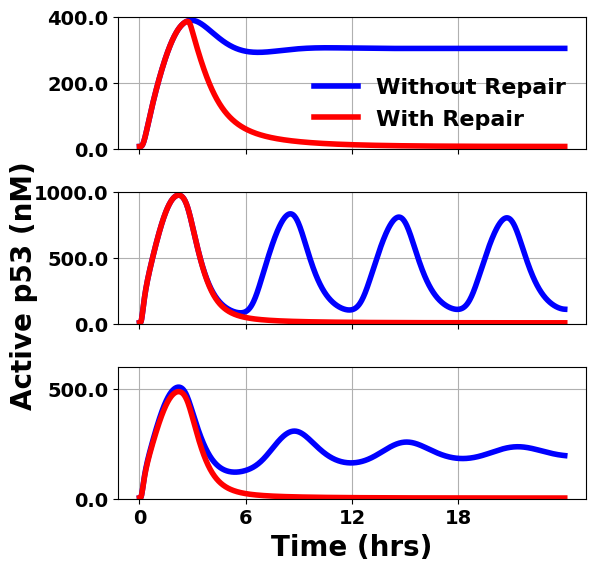

In [5]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3E/scripts'))
!mpiexec -n 8 python3 run_unit_test.py
with open ('../results/Fig3E.pkl', 'rb') as f:
    data = pickle.load(f)

conds = []
for condition in data.keys():
    conds.append(condition)

# Set up a 1x3 subplot grid
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

# Plot the first set of data
axs[0].plot(data[conds[0]]['cell 0']['p53_active']['toutS']/3600, data[conds[0]]['cell 0']['p53_active']['xoutS'], label='Without Repair', color='blue', linewidth=4)
axs[0].plot(data[conds[1]]['cell 0']['p53_active']['toutS']/3600, data[conds[1]]['cell 0']['p53_active']['xoutS'], label='With Repair', color='red', linewidth=4)
axs[0].grid(True)
axs[0].set_ylim(0, 400)
axs[0].set_yticklabels(axs[0].get_yticks(), weight='bold', fontsize=14)
axs[0].set_xticks(np.arange(0, 24, step=6))
axs[0].legend(frameon=False)

# Plot the second set of data
axs[1].plot(data[conds[2]]['cell 0']['p53_active']['toutS']/3600, data[conds[2]]['cell 0']['p53_active']['xoutS'], label='Without Repair', color='blue', linewidth=4)
axs[1].plot(data[conds[3]]['cell 0']['p53_active']['toutS']/3600, data[conds[3]]['cell 0']['p53_active']['xoutS'], label='With Repair', color='red', linewidth=4)
axs[1].grid(True)
axs[1].set_ylim(0, 1000)
axs[1].set_yticklabels(axs[1].get_yticks(), weight='bold', fontsize=14)
axs[1].set_xticks(np.arange(0, 24, step=6))
# axs[1].legend()

# Plot the third set of data
axs[2].plot(data[conds[4]]['cell 0']['p53_active']['toutS']/3600, data[conds[4]]['cell 0']['p53_active']['xoutS'], label='Without Repair', color='blue', linewidth=4)
axs[2].plot(data[conds[5]]['cell 0']['p53_active']['toutS']/3600, data[conds[5]]['cell 0']['p53_active']['xoutS'], label='With Repair', color='red', linewidth=4)
axs[2].grid(True)
axs[2].set_ylim(0, 1200)
axs[2].set_yticklabels(axs[2].get_yticks(), weight='bold', fontsize=14)
axs[2].set_xticklabels(axs[2].get_xticks(), weight='bold', fontsize=14)

# Set the x-axis label
axs[2].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(0.0, 0.5, 'Active p53 (nM)', va='center', rotation='vertical', weight='bold', fontsize=20)

plt.tight_layout()
fig.savefig('../results/Fig3E.png')

### Figure 3F unit test replication

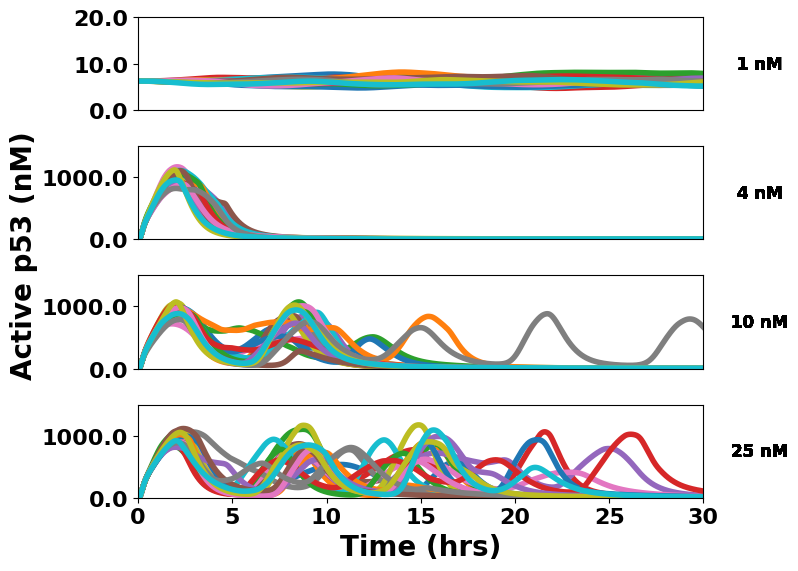

In [25]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3F/scripts'))
# !mpiexec -n 8 python3 run_unit_test.py
with open('../results/Fig3F.pkl', 'rb') as f:
    data = pickle.load(f)
conditions = ['1 nM', '4 nM', '10 nM', '25 nM']
fig, axes = plt.subplots(4,1, figsize=(8,6))
for i, condition in enumerate(data):
    ax = axes[i]
    for cell in data[condition]:
        ax.plot(data[condition][cell]['p53_pulse']['toutS']/3600, data[condition][cell]['p53_pulse']['xoutS'], label=cell, linewidth=4)
        ax.text(1.1, 0.5, conditions[i], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, weight='bold')
        if condition == 'DamageDSB_1':
            ax.set_ylim(0, 20) 
        else:
            ax.set_ylim(0, 1500)
        # ax.set_title(condition)
        # ax.legend()
        ax.set_xlim(0, 30)
        ax.set_xticks([])
    if i==3:
        ax.set_xticks(np.arange(0, 31, step=5))
    
    ax.set_xticklabels(ax.get_xticks(), fontsize=16, weight='bold')
    ax.set_yticklabels(ax.get_yticks(), fontsize=16, weight='bold')
plt.subplots_adjust(hspace=0.5)
        # Set the x-axis label
axes[3].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(-0.01, 0.55, 'Active p53 (nM)', va='center', rotation='vertical', weight='bold', fontsize=20)
plt.tight_layout()
fig.savefig('../results/Fig3F.png')

### Fig 3G Unit Test Replication

/tmp/ipykernel_13973/1664092211.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1664092211.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1664092211.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1664092211.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16, weight='bold', rotation=60)


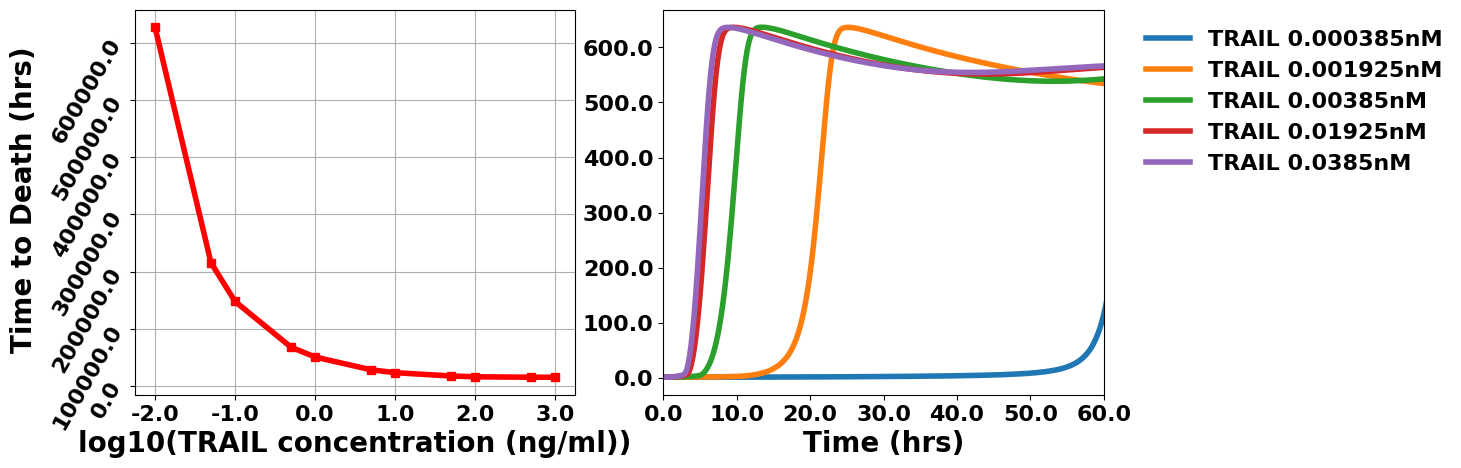

In [ ]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3G/scripts'))
!mpiexec -n 8 python3 run_unit_test.py
with open('../results/Fig3G.pkl', 'rb') as f:
   data = pickle.load(f)

traildoses = np.array([0.000385, 0.001925, 0.00385, 0.01925, 0.0385, 0.1925, 0.385, 1.9250, 3.85, 19.25, 38.5])
dosesngperml = traildoses*2.597402597402597e+01

conditions =[]
for condition in data:
    conditions.append(condition)

legend = []
for dose in traildoses:
   legend.append('TRAIL ' + str(dose) + 'nM')
fig, axs = plt.subplots(1, 2, figsize=(12.5, 5))
for i in range(1,11,2):
    axs[1].plot(data[conditions[i]]['cell 0']['cPARP_total']['toutS']/3600, data[conditions[i]]['cell 0']['cPARP_total']['xoutS'], linewidth=4)
    axs[1].set_xlim([0, 60])
    axs[1].set_xticklabels(axs[1].get_xticks(), fontsize=16, weight='bold')
    axs[1].set_yticklabels(axs[1].get_yticks(), fontsize=16, weight='bold')
    legend_properties = {'weight':'bold', 'size':16}
    axs[1].legend(labels=legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, frameon=False, prop=legend_properties)


time_of_death = CellDeathMetrics(data, 'cPARP_total').average_time_to_death()

axs[0].plot(np.log10(dosesngperml),time_of_death.values(),marker='s',linewidth=4, color='red')
axs[0].set_xticklabels(axs[0].get_xticks(), fontsize=16, weight='bold')
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize=16, weight='bold', rotation=60)
axs[0].grid(True)

# Set the x-axis label
axs[0].set_xlabel('log10(TRAIL concentration (ng/ml))', weight='bold', fontsize=20)
axs[1].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

# Set the y-axis label
fig.text(0.025, 0.5, 'Time to Death (hrs)', va='center', rotation='vertical', weight='bold', fontsize=20)

fig.savefig('../results/Fig3G.png', dpi=300, bbox_inches='tight')

## Fig 3H Unit Test Replication

[100.0, 100.0, 100.0, 35.0, 0.0, 0.0, 0.0]


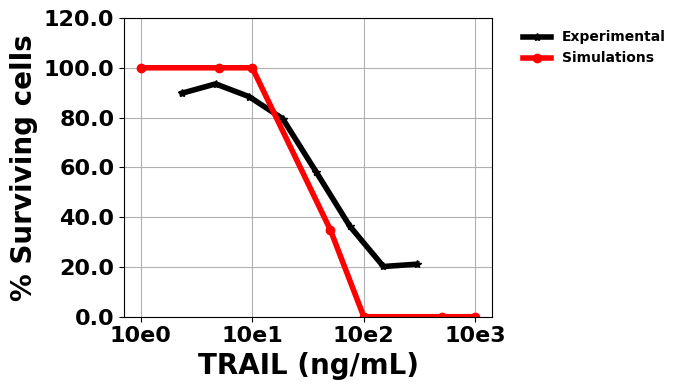

In [3]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3H/scripts/'))
# !mpiexec -n 8 python3 run_unit_test.py
with open('../results/Fig3H.pkl', 'rb') as f:
    data = pickle.load(f)

doses = [0.0385, 0.1925, 0.385, 1.925, 3.85, 19.25, 38.5]
alive_ratio = CellDeathMetrics(data, 'cPARP_total').alive_ratio(percent=True)
print(alive_ratio)
dosesngperml = np.array(doses)*2.597402597402597e+01
# print(alive
trailexpdoses = [2.34375,4.6875,9.375,18.75,37.5,75.0,150.0,300.0] # From Bouhaddou2018 model paper
trailexppdeath = [89.79,93.53,88.40,79.53,58.08,36.34,20.18,21.11] # From Bouhaddou2018 model paper

plt.figure(figsize=(7, 4))
plt.plot(np.log10(np.array(trailexpdoses)),np.array(trailexppdeath),marker='*', color = 'black', linewidth=4, label='Experiment') # Experimental
plt.plot(np.log10(np.array(dosesngperml)),alive_ratio,marker='o', color='red', linewidth=4, label='Simulation') # Simulations
plt.xlabel('TRAIL (ng/mL)', multialignment='center', fontsize=20, weight='bold')
plt.ylabel('% Surviving cells', fontsize=20, weight='bold')
plt.grid(True)
# plt.xlim(0, 72)
plt.ylim(0, 120)
plt.xticks(np.arange(0,4,step=1),('10e0', '10e1', '10e2', '10e3'), weight='bold', fontsize=16)
ax = plt.gca()
ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize=16)
legend_properties = {'weight':'bold'}
plt.legend(['Experimental','Simulations'], frameon = False, bbox_to_anchor=[1.05, 1], loc='upper left', fontsize=16, prop=legend_properties)
plt.tight_layout()
plt.savefig('../results/Fig3H.png', dpi=300, bbox_inches='tight')

### Fig 3I Unit Test Replication

rounds to complete: 1
Round 0
Rank 0 is running TRAIL_only for cell 0
Rank 2 is running TRIAL_PUMA_NOXA for cell 0
Rank 1 is running TRAIL_ERK_AKT for cell 0
562.3063278329101
Rank 2 sending
Rank 2 sent
538.4813656475712
Rank 0 sending
Rank 0 sent
tasks this round: 3
receiving
received results
completed tasks: 1
receiving
520.5441204822081
Rank 1 sending
Rank 1 sent
received results
completed tasks: 2
receiving
received results
completed tasks: 3
Calculating observable
No experimental data to compare to


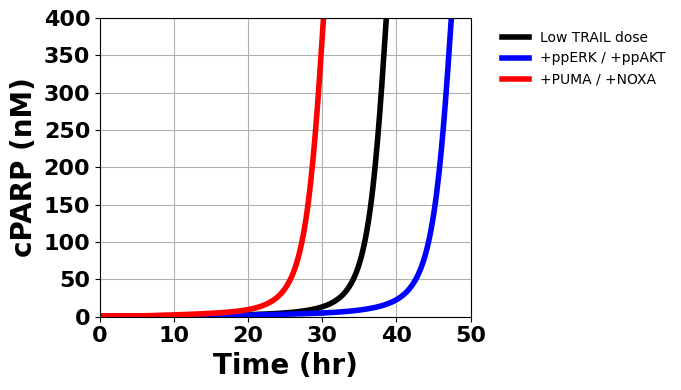

In [5]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3I/scripts/'))
!mpiexec -n 8 python3 run_unit_test.py
with open('../results/Fig3I.pkl', 'rb') as f:
    data = pickle.load(f)

plt.figure(figsize=(7, 4))
# for i, condition in enumerate(data):
plt.plot(data['TRAIL_only']['cell 0']['cPARP_total']['toutS']/3600, data['TRAIL_only']['cell 0']['cPARP_total']['xoutS'], label='TRAIL only', linewidth=4, color='black')
plt.plot(data['TRAIL_ERK_AKT']['cell 0']['cPARP_total']['toutS']/3600, data['TRAIL_ERK_AKT']['cell 0']['cPARP_total']['xoutS'], label='+ppERK/+ppAKT', linewidth=4, color='blue')
plt.plot(data['TRIAL_PUMA_NOXA']['cell 0']['cPARP_total']['toutS']/3600, data['TRIAL_PUMA_NOXA']['cell 0']['cPARP_total']['xoutS'], label='+PUMA/+NOXA', linewidth=4, color='red')
plt.xlabel('Time (hr)', fontsize=20, weight='bold')
plt.ylabel('cPARP (nM)', fontsize=20, weight='bold')
plt.grid(True)
plt.xlim(0, 50)
plt.ylim(0, 400)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.legend(['Low TRAIL dose','+ppERK / +ppAKT','+PUMA / +NOXA'], bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.savefig(os.path.join('../results/unit_test_3I.png'), dpi=300)

### Figure 3J unit test replication

rounds to complete: 1
Round 0
Rank 1 is running GF_0_CCND123_10 for cell 0
Rank 2 is running GF_0_CCND123_60 for cell 0
Rank 0 is running GF_0_CCND123_1 for cell 0
1.2857633605743382
Size of results dictionary: 128 bytes
Rank 1 sending
1.2857633601284313
Size of results dictionary: 128 bytes
tasks this round: 3
receiving
Rank 1 sent
received results
completed tasks: 1
receiving
2024-04-17 20:53:40.082 - amici.swig_wrappers - DEBUG - [CVODES:CVode:TOO_MUCH_WORK] AMICI ERROR: in module CVODES in function CVode : At t = 304978, mxstep steps taken before reaching tout. 
2024-04-17 20:53:40.083 - amici.swig_wrappers - ERROR - [FORWARD_FAILURE] AMICI forward simulation failed at t = 304978: AMICI failed to integrate the forward problem
nan
Size of results dictionary: 128 bytes
Rank 2 sending
Rank 2 sent
received results
completed tasks: 2
breaking
Calculating observable
No experimental data to compare to
['Cd_total', 'Ce_total', 'Ca_total', 'Cb_total', 'Cd_total', 'Ce_total', 'Ca_total', 'Cb

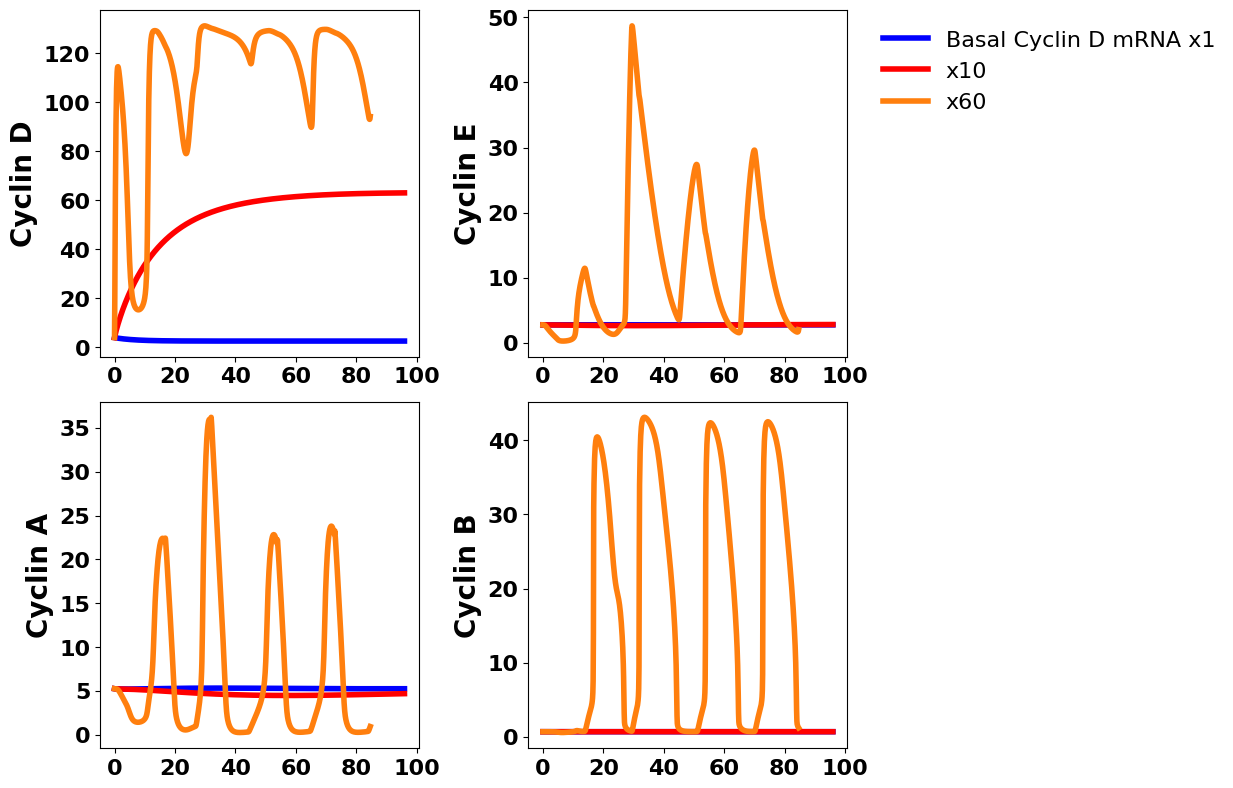

In [6]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig3J/scripts'))
!mpiexec -n 8 python3 run_unit_test.py
with open('../results/Fig3J.pkl', 'rb') as f:
    data = pickle.load(f)

observables = []
conditions = []
for condition in data:
    conditions.append(condition)
    for observable in data[condition]['cell 0']:
        observables.append(observable)
print(observables)
fig, ax = plt.subplots(2,2, figsize=(12.5,8))

#Cyclin D plot
ax[0,0].plot(data[conditions[0]]['cell 0'][observables[0]]['toutS']/3600, data[conditions[0]]['cell 0'][observables[0]]['xoutS'], linewidth=4, color='b')
ax[0,0].plot(data[conditions[1]]['cell 0'][observables[0]]['toutS']/3600, data[conditions[1]]['cell 0'][observables[0]]['xoutS'], linewidth=4, color='r')
ax[0,0].plot(data[conditions[2]]['cell 0'][observables[0]]['toutS']/3600, data[conditions[2]]['cell 0'][observables[0]]['xoutS'], linewidth=4, color='tab:orange')
ax[0,0].set_yticklabels(ax[0,0].get_yticks().astype(int), weight='bold', fontsize=16)
ax[0,0].set_xticklabels(ax[0,0].get_xticks().astype(int), weight='bold', fontsize=16)
# ax[0,0].set_title('Cyclin D', weight='bold', fontsize=16)
ax[0,0].set_ylabel('Cyclin D', weight='bold', fontsize=20)

#Cyclin E plot
ax[0,1].plot(data[conditions[0]]['cell 0'][observables[1]]['toutS']/3600, data[conditions[0]]['cell 0'][observables[1]]['xoutS'], linewidth=4, color='b')
ax[0,1].plot(data[conditions[1]]['cell 0'][observables[1]]['toutS']/3600, data[conditions[1]]['cell 0'][observables[1]]['xoutS'], linewidth=4, color='r')
ax[0,1].plot(data[conditions[2]]['cell 0'][observables[1]]['toutS']/3600, data[conditions[2]]['cell 0'][observables[1]]['xoutS'], linewidth=4, color='tab:orange')
ax[0,1].set_yticklabels(ax[0,1].get_yticks().astype(int), weight='bold', fontsize=16)
ax[0,1].set_xticklabels(ax[0,1].get_xticks().astype(int), weight='bold', fontsize=16)
# ax[0,1].set_title('Cyclin E', weight='bold', fontsize=16)
ax[0,1].set_ylabel('Cyclin E', weight='bold', fontsize=20)
ax[0,1].legend(['Basal Cyclin D mRNA x1', 'x10', 'x60'], bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=16)

#Cyclin A plot
ax[1,0].plot(data[conditions[0]]['cell 0'][observables[2]]['toutS']/3600, data[conditions[0]]['cell 0'][observables[2]]['xoutS'], linewidth=4, color='b')
ax[1,0].plot(data[conditions[1]]['cell 0'][observables[2]]['toutS']/3600, data[conditions[1]]['cell 0'][observables[2]]['xoutS'], linewidth=4, color='r')
ax[1,0].plot(data[conditions[2]]['cell 0'][observables[2]]['toutS']/3600, data[conditions[2]]['cell 0'][observables[2]]['xoutS'], linewidth=4, color='tab:orange')
ax[1,0].set_yticklabels(ax[1,0].get_yticks().astype(int), weight='bold', fontsize=16)
ax[1,0].set_xticklabels(ax[1,0].get_xticks().astype(int), weight='bold', fontsize=16)
ax[1,0].set_ylabel('Cyclin A', weight='bold', fontsize=20)
# ax[1,0].set_title('Cyclin A', weight='bold', fontsize=16)

#Cyclin B plot
ax[1,1].plot(data[conditions[0]]['cell 0'][observables[3]]['toutS']/3600, data[conditions[0]]['cell 0'][observables[3]]['xoutS'], linewidth=4, color='b')
ax[1,1].plot(data[conditions[1]]['cell 0'][observables[3]]['toutS']/3600, data[conditions[1]]['cell 0'][observables[3]]['xoutS'], linewidth=4, color='r')
ax[1,1].plot(data[conditions[2]]['cell 0'][observables[3]]['toutS']/3600, data[conditions[2]]['cell 0'][observables[3]]['xoutS'], linewidth=4, color='tab:orange')
ax[1,1].set_yticklabels(ax[1,1].get_yticks().astype(int), weight='bold', fontsize=16)
ax[1,1].set_xticklabels(ax[1,1].get_xticks().astype(int), weight='bold', fontsize=16)
# ax[1,1].set_title('Cyclin B', weight='bold', fontsize=16)
ax[1,1].set_ylabel('Cyclin B', weight='bold', fontsize=20)

fig.tight_layout()
fig.savefig('../results/Fig3J.png', dpi=300)

### Figure 4A Unit Test Replication

{'E_0_INS_0_k316_3': {'24': 0, '48': 0}, 'E_20_INS_0p001_k316_3': {'24': 0, '48': 50, '72': 64}}


Text(0.55, 0.0, 'Time Post Etoposide Treatment')

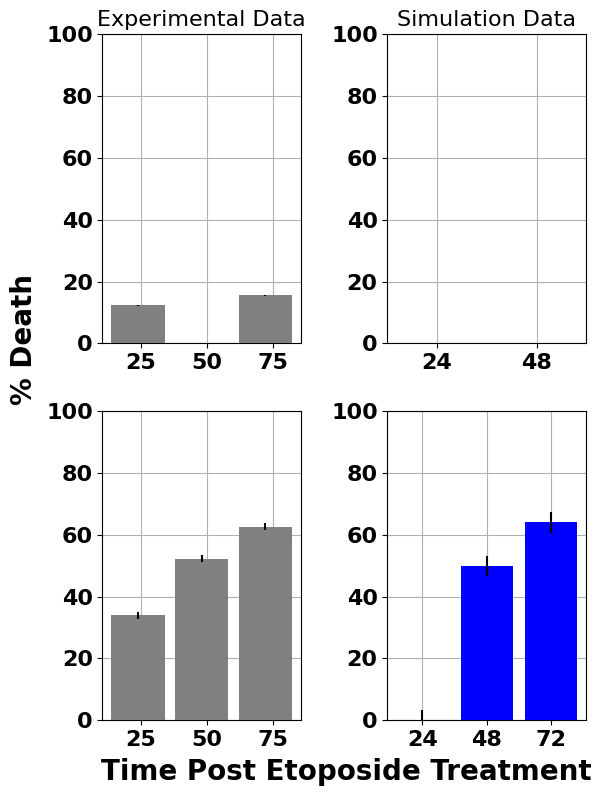

In [ ]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig4A/results'))
with open('Fig4A.pkl', 'rb') as f:
    data = pickle.load(f)

observable_dict = CellDeathMetrics(data, 'cPARP_100plus').time_to_death()

for condition in observable_dict:
    for i in observable_dict[condition]:
        if i is np.nan:
            observable_dict[condition].remove(i)

tod_ratios_per_condition = {}
tod_ratios_per_condition['E_0_INS_0_k316_3'] = {}
tod_ratios_per_condition['E_20_INS_0p001_k316_3'] = {}
tod_ratios_per_condition['E_0_INS_0_k316_3']['24'] = []
tod_ratios_per_condition['E_0_INS_0_k316_3']['48'] = []
tod_ratios_per_condition['E_20_INS_0p001_k316_3']['24'] = []
tod_ratios_per_condition['E_20_INS_0p001_k316_3']['48'] = []
tod_ratios_per_condition['E_20_INS_0p001_k316_3']['72'] = []

# I need to sort them by time between 24, 48, and 72 hours
for tod in observable_dict['E_0_INS_0_k316_3']:
    if tod/3600 <= 24:
        tod_ratios_per_condition['E_0_INS_0_k316_3']['24'].append(1)
    if tod/3600 <= 48:
        tod_ratios_per_condition['E_0_INS_0_k316_3']['48'].append(1)

tod_ratios_per_condition['E_0_INS_0_k316_3']['24']  = sum(tod_ratios_per_condition['E_0_INS_0_k316_3']['24'])
tod_ratios_per_condition['E_0_INS_0_k316_3']['48']  = sum(tod_ratios_per_condition['E_0_INS_0_k316_3']['48'])

for tod in observable_dict['E_20_INS_0p001_k316_3']:
    if tod/3600 <= 24:
        tod_ratios_per_condition['E_20_INS_0p001_k316_3']['24'].append(1)
    if tod/3600 <= 48:
        tod_ratios_per_condition['E_20_INS_0p001_k316_3']['48'].append(1)
    if tod/3600 <= 72:
        tod_ratios_per_condition['E_20_INS_0p001_k316_3']['72'].append(1)

tod_ratios_per_condition['E_20_INS_0p001_k316_3']['24']  = sum(tod_ratios_per_condition['E_20_INS_0p001_k316_3']['24'])
tod_ratios_per_condition['E_20_INS_0p001_k316_3']['48']  = sum(tod_ratios_per_condition['E_20_INS_0p001_k316_3']['48'])
tod_ratios_per_condition['E_20_INS_0p001_k316_3']['72']  = sum(tod_ratios_per_condition['E_20_INS_0p001_k316_3']['72'])
print(tod_ratios_per_condition)
dc_semSim_0 = list([np.sqrt(tod_ratios_per_condition['E_0_INS_0_k316_3'][time]*\
                                    (100-tod_ratios_per_condition['E_0_INS_0_k316_3'][time])/80)] for time in ['24', '48'])
dc_semSim_20 = np.mean(list([np.sqrt(tod_ratios_per_condition['E_20_INS_0p001_k316_3'][time]*\
                                     (100-tod_ratios_per_condition['E_20_INS_0p001_k316_3'][time])/100)] for time in ['24', '48', '72']))

dc_semExp_0 = np.std(data['E_0_INS_0_k316_3']['cell 0']['experiment cPARP_100plus']['xoutS'])/np.sqrt(80)

dc_semExp_20 = np.std(data['E_20_INS_0p001_k316_3']['cell 0']['experiment cPARP_100plus']['xoutS'])/np.sqrt(100)


# I'll need to add in error bars, then this plot tool will be ready to go.
fig, ax = plt.subplots(2, 2, figsize=(6, 8))
plt.rcParams['axes.grid'] = True
plt.grid(zorder=0)
# Plot the first set of data
ax[0,0].bar(data['E_0_INS_0_k316_3']['cell 0']['experiment cPARP_100plus']['toutS']/3600, 
            data['E_0_INS_0_k316_3']['cell 0']['experiment cPARP_100plus']['xoutS'], 
            color='grey', label='E_0_INS_0_k316_3', width=20, zorder=3, yerr=dc_semExp_0)
ax[0,0].set_ylim(0, 100)
ax[0,0].set_title('Experimental Data', fontsize=16)

ax[1,0].bar(data['E_20_INS_0p001_k316_3']['cell 0']['experiment cPARP_100plus']['toutS']/3600,
            data['E_20_INS_0p001_k316_3']['cell 0']['experiment cPARP_100plus']['xoutS'],
            color='grey', label='E_20_INS_0p001_k316_3', width=20, zorder=3, yerr=dc_semExp_20)
ax[1,0].set_ylim(0, 100)

ax[0,1].bar(['24', '48'], [tod_ratios_per_condition['E_0_INS_0_k316_3']['24'], 
                           tod_ratios_per_condition['E_0_INS_0_k316_3']['48']], color='blue', label='E_0_INS_0_k316_3', zorder=3, yerr=dc_semSim_0)
ax[0,1].set_ylim(0, 100)
ax[0,1].set_title('Simulation Data', fontsize=16)
ax[1,1].bar(['24', '48', '72'], [tod_ratios_per_condition['E_20_INS_0p001_k316_3']['24'], 
                                 tod_ratios_per_condition['E_20_INS_0p001_k316_3']['48'], 
                                 tod_ratios_per_condition['E_20_INS_0p001_k316_3']['72']], color='blue', label='E_20_INS_0p001_k316_3', zorder=3, yerr=dc_semSim_20)
ax[1,1].set_ylim(0, 100)
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'
plt.tight_layout()
fig.text(-0.01, 0.55, '% Death', va='center', rotation='vertical', weight='bold', fontsize=20)
fig.text(0.55, 0.0, 'Time Post Etoposide Treatment', ha='center', fontsize=20, weight='bold')


### Figure 5A Unit Test Replication

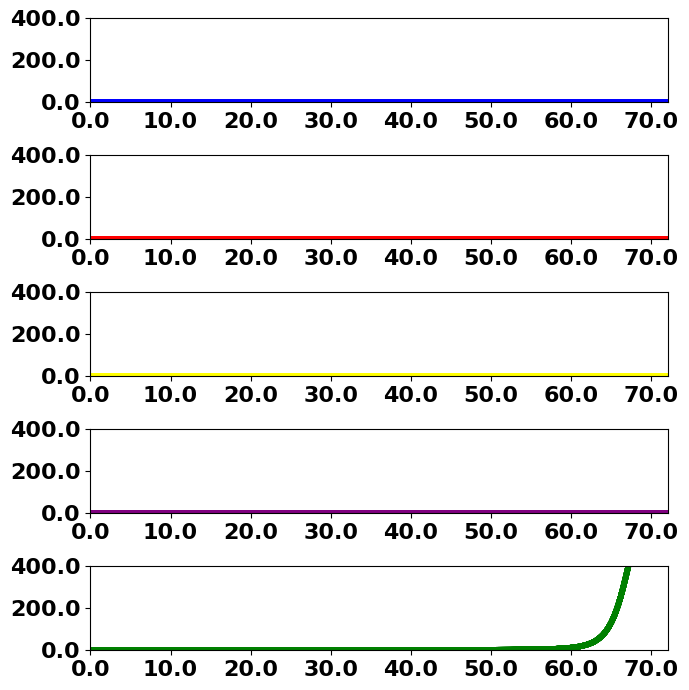

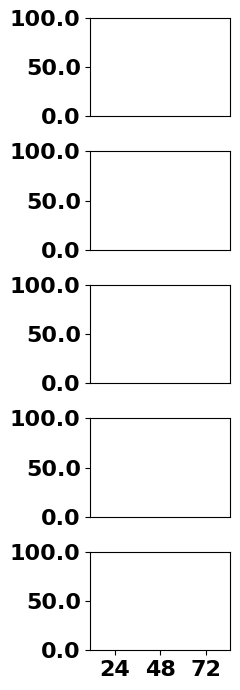

In [ ]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig5A/results'))

with open('Fig5A.pkl', 'rb') as f:
    data = pickle.load(f)

colors = ['blue', 'red', 'yellow', 'purple', 'green']

fig, axes = plt.subplots(5, 1, figsize=(7, 7))
for i, condition in enumerate(data):
    for cell in data[condition]:
        axes[i].plot(data[condition][cell]['cPARP_total']['toutS']/3600, \
            data[condition][cell]['cPARP_total']['xoutS'], linewidth=4, color=colors[i])
        
    axes[i].set_ylim(0, 400)
    axes[i].set_xlim(0, 72)
    # axes[0].axvline(x=24, color='black', linestyle='--', label='24-hour point')  # Add vertical dashed line
    axes[i].set_xticklabels(axes[i].get_xticks(), fontsize=16, weight='bold')
    axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=16, weight='bold')

plt.tight_layout()
fig.savefig('Fig5A.png', dpi=300)

dead_cells = CellDeathMetrics(data , 'cPARP_total').time_to_death()
dead_cells_24to72 = {}
fig , axes = plt.subplots(5, 1, figsize=(2.5, 7))
for i, condition in enumerate(dead_cells):
    dead_cells_24to72[condition] = {}
    dead_cells_24to72[condition]['24'] = []
    dead_cells_24to72[condition]['48'] = []
    dead_cells_24to72[condition]['72'] = []
    for cell in range(30):
        if dead_cells[condition][cell] is None:
            dead_cells[condition][cell] = 100
        if dead_cells[condition][cell] <= 24:
            dead_cells_24to72[condition]['24'].append(1)
        if dead_cells[condition][cell] <= 48:
            dead_cells_24to72[condition]['48'].append(1)
        if dead_cells[condition][cell] <= 72:
            dead_cells_24to72[condition]['72'].append(1)
    dead_cells_24to72[condition]['24'] = len(dead_cells_24to72[condition]['24'])/len(data[condition])*100
    dead_cells_24to72[condition]['48'] = len(dead_cells_24to72[condition]['48'])/len(data[condition])*100
    dead_cells_24to72[condition]['72'] = len(dead_cells_24to72[condition]['72'])/len(data[condition])*100
    dc_sem = np.sqrt(dead_cells_24to72[condition]['72']*(100-dead_cells_24to72[condition]['72'])/len(data[condition]))
    axes[i].bar(dead_cells_24to72[condition].keys(), dead_cells_24to72[condition].values(), yerr=dc_sem, color=colors[i])
    axes[i].set_ylim(0, 100)
    axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=16, weight='bold')
    # axes[i].set_xlabel(condition, weight='bold')
    if i < 4:
        axes[i].set_xticks([])
    else:
        axes[4].set_xticklabels([24, 48, 72], fontsize=16, weight='bold')

plt.tight_layout()
fig.savefig('Fig5A_barplot.png')

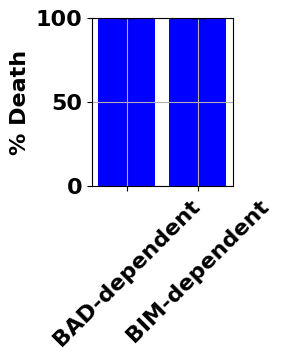

In [ ]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig5C/results'))

with open('Fig5C.pkl', 'rb') as f:
    data = pickle.load(f)

dead_cells = CellDeathMetrics(data, 'cPARP_total').death_ratio(percent=True)
dead_cell_values = np.array(list(dead_cells.values()))
conditions = []
for condition in data:
    conditions.append(condition)

labels=['BAD-dependent', 'BIM-dependent']

num_cells = len(data[conditions[0]])
dc_sem = np.sqrt((dead_cell_values*(100-dead_cell_values))/num_cells)

fig = plt.figure(figsize=(3, 4))
plt.bar(dead_cells.keys(), dead_cells.values(), yerr=dc_sem, capsize=5, color='blue')
plt.ylim(0, 100)
plt.yticks(np.arange(0, 150, 50), fontsize=16, weight='bold')
plt.ylabel('% Death', fontsize=16, weight='bold')
plt.xticks(ticks=range(len(dead_cells)), labels=labels,rotation=45, fontsize=16, weight='bold')
# plt.title('E + I @ 48 hours (SPARCED)', y=1.05)
plt.tight_layout()

plt.savefig('Fig5C.png', dpi=300)

### Figure 6B Unit Test Replication

/tmp/ipykernel_13973/1407595278.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticks(), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1407595278.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1407595278.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=16, weight='bold')


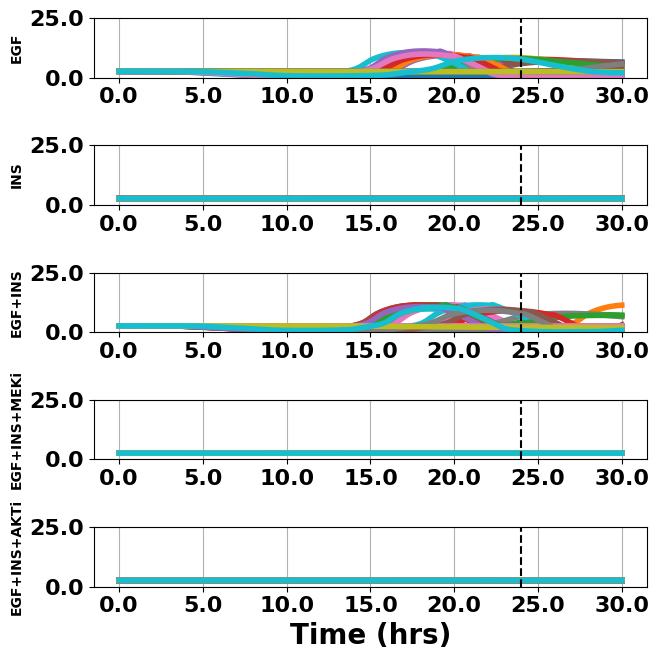

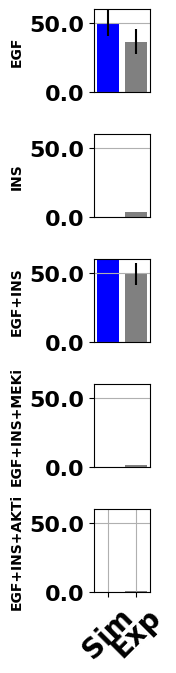

In [ ]:
os.chdir(os.path.join(sparced_root, 'unit_tests/Fig6B/results'))

cond_labels = ['EGF', 'INS', 'EGF+INS', 'EGF+INS+MEKi', 'EGF+INS+AKTi']

with open('Fig6B.pkl', 'rb') as f:
    data = pickle.load(f)

fig, axes = plt.subplots(5, 1, figsize=(7, 7))
for i, condition in enumerate(data):
    for cell in data[condition]:
        axes[i].plot(data[condition][cell]['cycA_Cdk2_total']['toutS']/3600, \
            data[condition][cell]['cycA_Cdk2_total']['xoutS'], linewidth=4)


    # axes[i].set_title(entry)
    axes[i].set_ylim(0, 50)
    axes[i].axvline(x=24, color='black', linestyle='--', label='24-hour point')  # Add vertical dashed line
    axes[i].set_xticklabels(axes[i].get_xticks(), fontsize=16, weight='bold')
    axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=16, weight='bold')
    axes[i].set_ylabel(cond_labels[i], weight='bold', fontsize=10)
axes[4].set_xlabel('Time (hrs)', weight='bold', fontsize=20)

plt.tight_layout()
# plt.subplots_adjust(hspace=-0.00005)
fig.savefig('Fig6B.png', dpi=300)
# Create the proliferation bar plots
num_cells = 30
CellsInSphase = {}
labels = ['Sim', 'Exp']
exp_data = [36.4773, 3.899, 49.2645, 1.55545, 0.81705]
cond_labels = ['EGF', 'INS', 'EGF+INS', 'EGF+INS+MEKi', 'EGF+INS+AKTi']
fig, axes = plt.subplots(5, 1, figsize=(2, 7))
for i, condition in enumerate(data):
    CellsInSphase[condition] = {}
    CellsInSphase[condition]['Ratio'] = []
    for cell in data[condition]:

        if any (value > 20 for value in data[condition][cell]['Sphase']['xoutS']):
            # print(cell)
            CellsInSphase[condition]['Ratio'].append(cell)
        
    
    ratio = (len(CellsInSphase[condition]['Ratio'])/num_cells)*100
    CellsInSphase[condition]['Ratio'] = []
    CellsInSphase[condition]['Ratio'].append(ratio)
    CellsInSphase[condition]['Ratio'].append(exp_data[i])
    dc_sem = np.sqrt(ratio*(100-ratio)/num_cells)
    axes[i].bar(labels, CellsInSphase[condition]['Ratio'], yerr=dc_sem, color = ['blue', 'grey'])
    axes[i].set_ylim(0, 60)
    axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=16, weight='bold')
    axes[i].set_ylabel(cond_labels[i], weight='bold', fontsize=10)
    axes[i].set_xticks([])

#Set the x ticks and rotate the labels 45 degrees
axes[4].set_xticks(range(2))
axes[4].set_xticklabels(['Sim', 'Exp'], rotation=45)
plt.tight_layout()

# Make the bar plot x labels bold and font 20
plt.xticks(fontsize=20, weight='bold')
fig.savefig('SPhase_barplot.png')

### Figure S2D Unit Test Replication

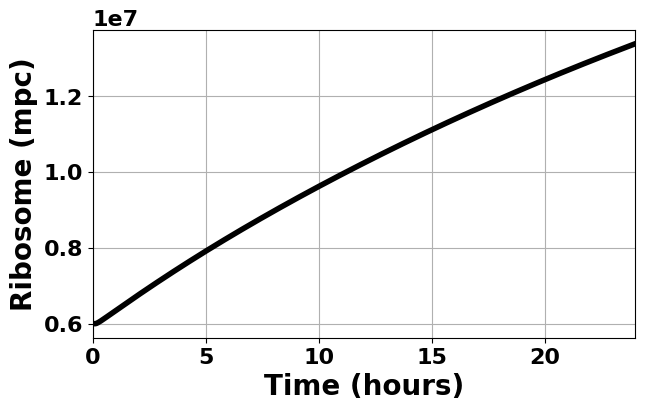

In [ ]:
os.chdir(os.path.join(sparced_root, 'unit_tests/FigS2D/results'))

with open('FigS2D.pkl', 'rb') as f:
    data = pickle.load(f)
Vc = 5.25E-12

mpc2nmcf_Vc = 1.0E9/(Vc*6.023E+23)

plt.figure(figsize=(7, 4))
yy = np.array(data['Ribosome_mpc']['cell 0']['Ribosome_total']['xoutS'])
tt = (data['Ribosome_mpc']['cell 0']['Ribosome_total']['toutS']/3600)
plt.plot(tt, yy,linewidth=4, color='black')
plt.xlim([0, 24])
plt.ylabel('Ribosome (mpc)', fontsize=20, weight='bold')
plt.xlabel('Time (hours)', fontsize=20, weight='bold')
plt.savefig('FigS2D_v1.png')

### FigS3C Unit Test Replication

/tmp/ipykernel_13973/1414789455.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, 1].set_yticklabels(axes[i, 1].get_yticks().astype(int), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1414789455.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, 1].set_xticklabels(axes[i, 1].get_xticks().astype(int), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1414789455.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, 0].set_yticklabels(axes[i, 0].get_yticks().astype(int), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1414789455.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, 0].set_xticklabels(axes[i, 0].get_xticks().astype(int), fontsize=16, weight='bold')
/tmp/ipykernel_13973/1414789455.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3, 1].set_yticklabels(np.arange(0.0,1.0, step=0

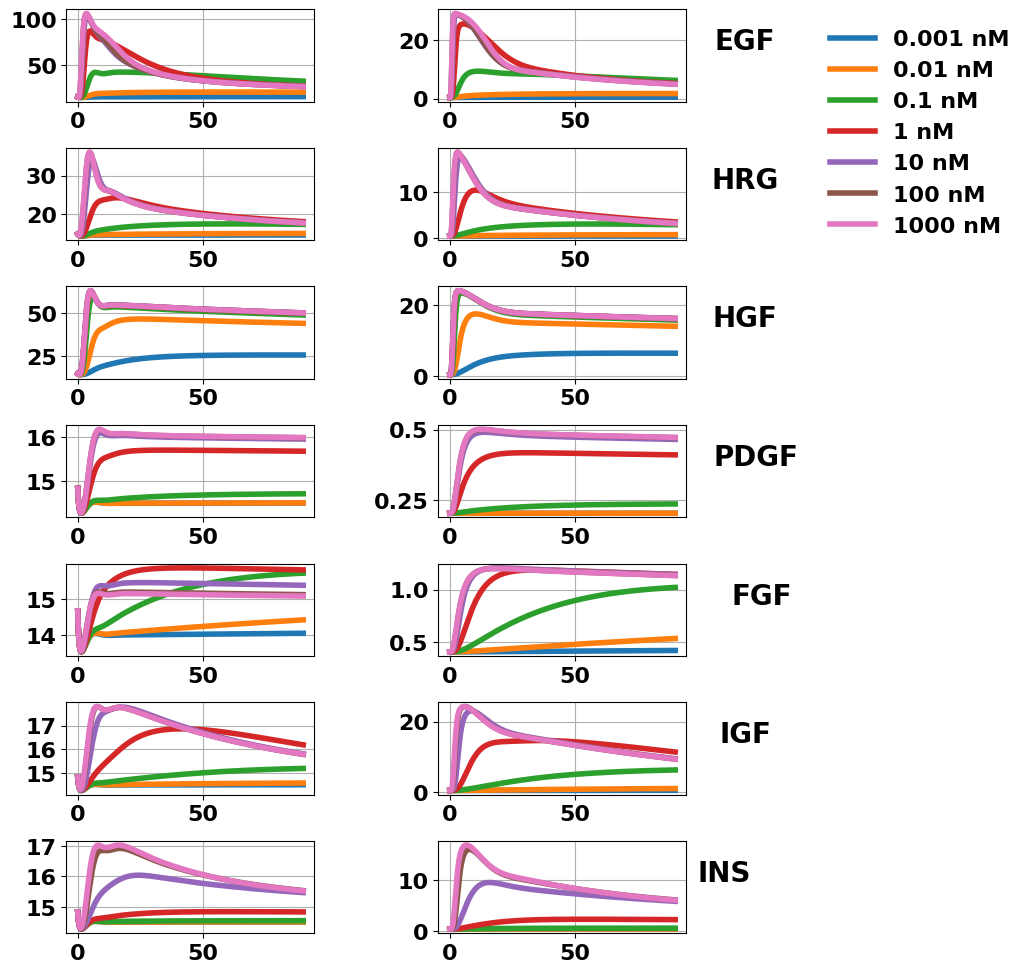

In [ ]:
os.chdir(os.path.join(sparced_root, 'unit_tests/FigS3C/results'))
with open('FigS3C.pkl', 'rb') as f:
    data = pickle.load(f)

conditional_strings = ['EGF', 'HRG', 'HGF', 'PDGF', 'FGF', 'IGF', 'INS']
fig, axes = plt.subplots(7, 2, figsize=(8, 12))  # Adjust figsize as needed
conditions =[]
for condition in data:
    conditions.append(condition)

for i in range(7):
    upper = (i+1)*7
    lower = upper - 7
    for j in range(lower, upper):
        axes[i, 0].plot(data[conditions[j]]['cell 0']['ppERK_total']['toutS'] / 60, data[conditions[j]]['cell 0']['ppERK_total']['xoutS'], linewidth=4)
        axes[i, 1].plot(data[conditions[j]]['cell 0']['ppAKT_total']['toutS'] / 60, data[conditions[j]]['cell 0']['ppAKT_total']['xoutS'], linewidth=4)

    axes[i, 1].set_yticklabels(axes[i, 1].get_yticks().astype(int), fontsize=16, weight='bold')
    axes[i, 1].set_xticklabels(axes[i, 1].get_xticks().astype(int), fontsize=16, weight='bold')
    axes[i, 0].set_yticklabels(axes[i, 0].get_yticks().astype(int), fontsize=16, weight='bold')
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticks().astype(int), fontsize=16, weight='bold')
    axes[i, 1].set_ylabel(conditional_strings[i], fontsize=20, weight='bold', labelpad=-250, rotation=0)
axes[3, 1].set_ylabel(conditional_strings[3], fontsize=20, weight='bold', labelpad=-275, rotation=0)
axes[4, 1].set_ylabel(conditional_strings[4], fontsize=20, weight='bold', labelpad=-268, rotation=0)
axes[6, 1].set_ylabel(conditional_strings[6], fontsize=20, weight='bold', labelpad=-235, rotation=0)

axes[3, 1].set_yticklabels(np.arange(0.0,1.0, step=0.25), fontsize=16, weight='bold')
axes[4, 1].set_yticklabels(axes[4, 1].get_yticks(), fontsize=16, weight='bold')
legend_values = ['0.001 nM', '0.01 nM', '0.1 nM', '1 nM', '10 nM', '100 nM', '1000 nM']
legend_properties = {'weight':'bold'}
axes[0, 1].legend(labels = legend_values, loc='upper left', bbox_to_anchor=(1.5, 1), frameon=False, fontsize=20, prop=legend_properties)


# plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.savefig('FigS3C.png', dpi=300, bbox_inches='tight')

## Unit Tests Complete